In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/home/latief/latihan/archive (2)/cirrhosis.csv')

In [3]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

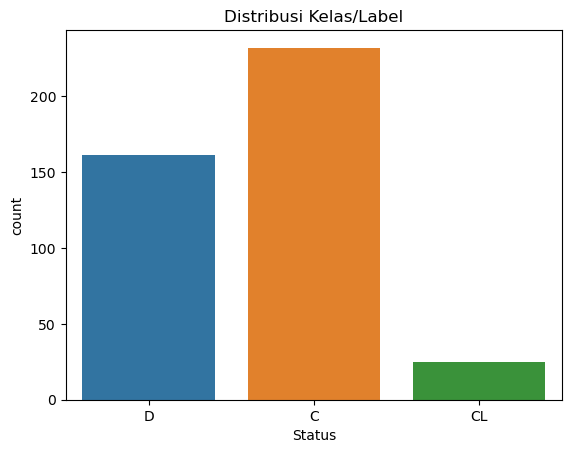

In [5]:
sns.countplot(x='Status', data=df)
plt.title('Distribusi Kelas/Label')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [7]:
df.

SyntaxError: invalid syntax (791285630.py, line 1)

In [8]:
coba = df.copy()

In [9]:
coba.Drug = coba.Drug.astype('category')
coba.Drug = coba.Drug.cat.codes

In [10]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [11]:
df['Drug'] = df['Drug'].fillna(df['Drug'].mode()[0])

In [12]:
df['Spiders'] = df['Spiders'].fillna(df['Spiders'].mode()[0])

In [13]:
df['Hepatomegaly'] = df['Hepatomegaly'].fillna(df['Hepatomegaly'].mode()[0])

In [14]:
df['Ascites'] = df['Ascites'].fillna(df['Ascites'].mode()[0])

In [15]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for cols in categorical_cols:
    df[cols] = LabelEncoder().fit_transform(df[cols])

In [18]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from collections import Counter


x = df.drop(columns='Status')
y = df.Status

x = KNNImputer(n_neighbors=5).fit_transform(x)

print('Original dataset shape %s' % Counter(y))
smt = SMOTETomek(random_state=42)
x_res, y_res = smt.fit_resample(x, y)
print('Resampled dataset with SMOTE-Tomek shape %s' % Counter(y_res))


x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)



Original dataset shape Counter({0: 232, 2: 161, 1: 25})
Resampled dataset with SMOTE-Tomek shape Counter({1: 225, 2: 208, 0: 203})


In [19]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('HASIL AKURASI RESAMPLING DENGAN SMOTE-TOMEK')
print(classification_report(y_test, y_pred))

HASIL AKURASI RESAMPLING DENGAN SMOTE-TOMEK
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.91      0.98      0.94        42
           2       0.88      0.88      0.88        49

    accuracy                           0.89       128
   macro avg       0.89      0.89      0.89       128
weighted avg       0.89      0.89      0.89       128



In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred_biasa = clf.predict(x_test)
print('HASIL AKURASI TANPA RESAMPLING')
print(classification_report(y_test, y_pred_biasa))

HASIL AKURASI TANPA RESAMPLING
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        44
           1       1.00      0.25      0.40         4
           2       0.82      0.78      0.80        36

    accuracy                           0.81        84
   macro avg       0.87      0.64      0.68        84
weighted avg       0.82      0.81      0.80        84



In [21]:
from imblearn.combine import SMOTEENN

print('Original dataset shape %s' % Counter(y))
smt = SMOTEENN(random_state=42)
x_resample, y_resample = smt.fit_resample(x, y)
print('Resampled dataset with SMOTE-EENN shape %s' % Counter(y_resample))


x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred_eenn = clf.predict(x_test)

print('HASIL AKURASI RESAMPLING DENGAN SMOTE-ENN')
print(classification_report(y_test, y_pred_eenn))

Original dataset shape Counter({0: 232, 2: 161, 1: 25})
Resampled dataset with SMOTE-EENN shape Counter({1: 181, 2: 106, 0: 53})
HASIL AKURASI RESAMPLING DENGAN SMOTE-ENN
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.93      1.00      0.96        38
           2       0.95      0.95      0.95        20

    accuracy                           0.94        68
   macro avg       0.96      0.88      0.91        68
weighted avg       0.94      0.94      0.94        68



In [24]:
y_resample.value_counts()

Status
1    181
2    106
0     53
Name: count, dtype: int64